In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def rescale(x):
    return (x - np.min(x)) / np.ptp(x)


def create_markup(df, α=1.1):
    counts = df.period.value_counts()
    counts = (counts * 10 / counts.index > α) & (counts.index > 0)
    counts = counts.astype(float)
    result = df.copy()
    result["proba"] = result.period.replace(counts)
    return result

In [3]:
filename = "../data/synthetic-latest.csv"
df = pd.read_csv(filename)

df_sample = df[2700: 4000].copy()
df_sample = create_markup(df_sample)

# filename_sample = "../data/synthetic-sample.csv"
# df_sample = pd.read_csv(filename_sample)
df_sample.head()

,x,y,z,period,proba
2700,-1.532737,-251.306018,-91.542163,0.0,0.0
2701,-1.278394,-251.180729,-91.094284,0.0,0.0
2702,-1.001983,-251.041610,-90.663017,0.0,0.0
2703,-0.718477,-250.921989,-90.229613,0.0,0.0
2704,-0.409787,-250.807903,-89.811278,0.0,0.0


In [4]:
starts = np.nonzero((df_sample.proba.diff() > 0).values)[0].tolist()
ends = np.nonzero((df_sample.proba.diff() < 0).values)[0].tolist()

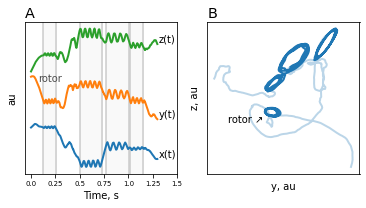

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(6, 2.8))

lw = 2

plt.sca(axes[0])

for i, c in enumerate("xyz"):
    # x = df_sample.index
    y = rescale(df_sample[c]) * 0.9 + i
    y = np.array(y)
    x = np.arange(len(y))
    plt.plot(x, y, lw=lw) # , c=df_sample.proba, vmin=0, vmax=1)
    plt.text(x[-1] + 10, y[-1] + 0., f"{c}(t)", va="bottom", ha="left")
    
color = "0.8"    

for i1, i2 in zip(starts, ends):
    plt.axvline(i1, c=color, zorder=-10)
    plt.axvline(i2, c=color, zorder=-10)
    plt.axvspan(i1, i2, zorder=-10, alpha=0.1, color=color)
    
plt.text((starts[0] + ends[0]) / 2, 1.8, "rotor", ha="center", color="0.3")


au = "arbitrary units"
au = "AU"
au = "au"

plt.yticks([])
plt.ylabel(au)

xticks = np.arange(0, 1501, 250)
plt.xticks(xticks, xticks / 1000)
plt.xlabel("Time, s")

##################################

plt.sca(axes[1])


cx, cy = "y", "z"
proba = df_sample.proba.values
x = rescale(df_sample[cx])
y = rescale(df_sample[cy])

for p in 0, 1:
    
    if p:
        color = "C0"
        ls = "-"
        alpha = 1
    else:
        color = "C0"
        ls = "-"
        alpha = 0.3
    
    x_ = x.copy()
    y_ = y.copy()
    
    x_[proba != p] = np.NaN
    y_[proba != p] = np.NaN

    plt.plot(
        x_,
        y_,
        color=color,
        ls=ls,
        alpha=alpha,
        lw=lw
    )
    
plt.text(0.1, 0.32, "rotor ↗")

plt.xticks([])
plt.xlabel(f"{cx}, {au}")
plt.yticks([])
plt.ylabel(f"{cy}, {au}")


letters = "ABCD"
for ax, letter in zip(axes, letters):
    ax.tick_params(axis="x", labelsize="x-small")
    ax.tick_params(axis="y", labelsize="x-small")
    
    letter_margin_x = 0.0
    letter_margin_y = 0.02
    letter_params = dict(
        weight="normal",
        size="x-large"
    )
    
    pos = ax.get_position()

    fig.text(
        pos.xmin - letter_margin_x,
        pos.ymax + letter_margin_y,
        letter,
        **letter_params
    )
    
# plt.savefig(
#     "../images/synthetic-rotors.png",
#     facecolor="white",
#     bbox_inches="tight",
#     dpi=300
# )